# Conditioning and the Multivariate Normal

In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats
np.random.seed(0)

When $Y$ and $\mathbf{X}$ have a multivariate normal distribution with positive definite covariance matrix, then best linear predictor derived in the previous section is the best among all predictors of $Y$ based on $\mathbf{X}$. That is,

$$
~E(Y \mid \mathbf{X}) = \boldsymbol{\Sigma}_{Y, \mathbf{X}}\boldsymbol{\Sigma}_\mathbf{X}^{-1} (\mathbf{X} - \boldsymbol{\mu}_\mathbf{X}) + \mu_Y
$$

$$
Var(Y \mid \mathbf{X}) = \sigma_Y^2 - \boldsymbol{\Sigma}_{Y, \mathbf{X}}\boldsymbol{\Sigma}_\mathbf{X}^{-1} \boldsymbol{\Sigma}_{\mathbf{X}, Y}
$$


Also, the conditional distribution of $Y$ given $\mathbf{X}$ is normal.

These results are extensions of those in the case where $Y$ was predicted based on just one predictor $X$. To prove them, you need some linear algebra and some patience. We won't do the proofs here. Based on what you have seen in the case of a single predictor, it should not be hard to believe that they are true.

For some reassurance, we can simulate data from a trivariate normal distribution and see how our formula for the conditional expectation works in relation to the simulated points.

To do this, we will first set up some notation. When we say that $Y$ and $\mathbf{X}$ have a multivariate normal distribution, we are saying that the $(1+p) \times 1$ random vector $[Y, X_1, X_2, \ldots, X_p]^T$ has a bivariate normal distribution.

To keep our variables organized and our notation compact, we will *partition* the random vector and its mean vector.

$$
\begin{bmatrix}
Y \\
X_1 \\
X_2 \\
\vdots \\
X_p
\end{bmatrix}
~ = ~ 
\begin{bmatrix}
Y \\
\mathbf{X}
\end{bmatrix}
~~~~~~~~~~~~~~~
\begin{bmatrix}
\mu_Y \\
\mu_{X_1} \\
\mu_{X_2} \\
\vdots \\
\mu_{X_p}
\end{bmatrix}
~ = ~ 
\begin{bmatrix}
\mu_Y \\
\boldsymbol{\mu}_\mathbf{X}
\end{bmatrix}
$$

We can partition the covariance matrix as well, according to the demarcating lines shown below.

$$
\boldsymbol{\Sigma} ~ = ~
\left[\begin{array}{c|cccc}
\sigma_Y^2 & \sigma_{Y, X_1} & \sigma_{Y, X_2} & \cdots & \sigma_{Y, X_p}\\ \hline
\sigma_{X_1, Y} & \sigma_{X_1}^2 & \sigma_{X_1, X_3} & \cdots & \sigma_{X_2, X_p} \\ 
\vdots & \vdots & \ddots &\vdots & \vdots \\ 
\sigma_{X_p, Y} & \sigma_{X_p, X_1} & \sigma_{X_p, X_2} & \cdots & \sigma_{X_p}^2 \\
\end{array}\right]
~ = ~ 
\left[\begin{array}{c|c}
\sigma_Y^2& \boldsymbol{\Sigma}_{Y,\mathbf{X}} \\ \hline
\boldsymbol{\Sigma}_{\mathbf{X},Y} & \boldsymbol{\Sigma}_\mathbf{X}\\
\end{array}\right]
$$

The cell below produces a simulation of 200 points drawn from the multivariate normal distribution with the parameters provided. The variable plotted on the vertical dimension is $Y$, with the other two axes representing the two predictors $X_1$ and $X_2$.

The plane is 

$$
E(Y \mid \mathbf{X}) = \boldsymbol{\Sigma}_{Y, \mathbf{X}}\boldsymbol{\Sigma}_\mathbf{X}^{-1} (\mathbf{X} - \boldsymbol{\mu}_\mathbf{X}) + \mu_Y
$$ 

**Keep in mind that the plane is computed according to this formula; it has not been estimated based on the simulated points.**

Notice that all three variables are in standard units and that the two predictor variables are not highly correlated: $r(X_1, X_2) = 0.2$. You can change the parameters, of course, but you will get an error message if you enter a "covariance matrix" that is not positive semidefinite.

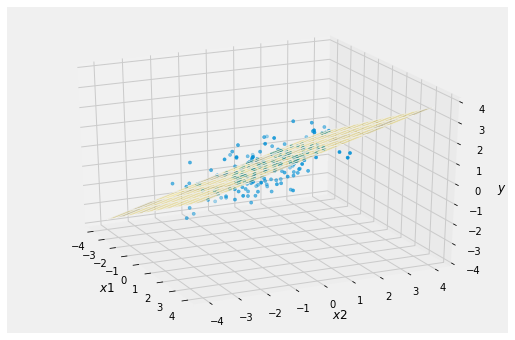

In [2]:
mu = [0, 0, 0]
cov = np.array([[1, 0.6, 0.5],
                [0.6, 1, 0.2],
                [0.5, 0.2, 1]])
Plot_multivariate_normal_cond_exp(mu, cov, 200)

This is the three-dimensional version of the familiar football shaped scatter diagram with the "best predictor" line going through it. The plane that is the conditional expectation of $Y$ given $\mathbf{X}$ goes through the "vertical center" of the cloud.

In the simulation below, the correlations between $Y$ and two predictor variables have been reduced. Notice the greater spread about the plane.

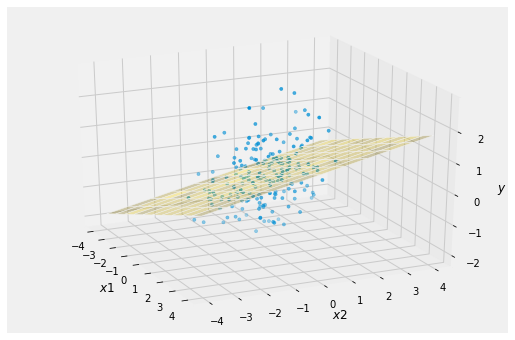

In [3]:
mu = [0, 0, 0]
cov = np.array([[1, 0.3, 0.25],
                [0.3, 1, 0.2],
                [0.25, 0.2, 1]])
Plot_multivariate_normal_cond_exp(mu, cov, 200)

The calcuations of this chapter, for predicting the value of a random variabe $Y$ by a linear function of random variables $X_1, X_2, \ldots, X_p$, have direct applications to data. 

In the data setting, what we see is just a cloud of points:

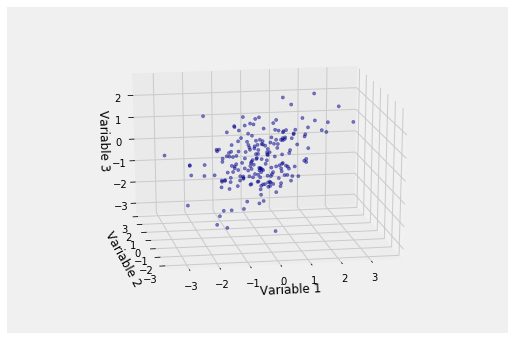

In [4]:
Scatter_multivariate_normal(mu, cov, 200)

But we don't know the parameters of the distribution, so we can't draw the right plane through the scatter. The problem of multiple regression is to *estimate* that plane based on the data, under appropriate assumptions.

That is the topic of the next section, which concludes the course.